# Assignment 3: Clustering California Housing with K-means

### CS 4501 Machine Learning - Department of Computer Science - University of Virginia
"Tonight, more than 130,000 Californians will go to sleep homeless. That’s enough to fill Dodger Stadium, AT&T Park and Petco Park. The biggest culprit is rising housing costs. From 2000 to 2014, median rent in California increased by more than one-third, while real incomes for renters fell by 7 percent. Today, 1.5 million Californians spend more than half their income on housing. This crisis threatens not just low-income families but our entire economy, driving businesses to relocate to states in which their employees can afford to live. - **Business Insider, Sep 2018.**"

![Half of the homes in San Franciso is now one million or above](https://amp.businessinsider.com/images/573de0b88d3eaea27198a55d-960-480.jpg)

In this assignment, you will attempt to cluster the California Housing by implementing and analyzing the k-means algorithm to the data. K-Means is one of the most popular clustering algorithms. K-means stores k-centroids that it uses to define clusters. A point is considered to be in a particular cluster if it is closer to that cluster's centroid than any other centroid. For references, you may refer to my lecture 9 or Chapter 2 of the textbook if you need additional sample codes to help with your assignment. For deliverables, you must write code in Python and submit this Jupyter Notebook file (.ipynb) to earn a total of 100 pts. You will gain points depending on how you perform in the following sections.


---
## 1. PRE-PROCESSING THE DATA (10 pts)

Download the California Housing dataset from the below link. This dataset includes statistics about the median income, median age, average number of rooms per person, average number of persons in a household etc. The statistics were gathered per geographical block.

**Data Acquiring:** Download the dataset from https://www.kaggle.com/camnugent/california-housing-prices

**Data Discovery, Visualization, and Cleaning:** Fortunately, this step have been given to you (for free) from chapter 2. However, you should review them and write the code necessary for the purposes of this assignment. 

In [1]:
# You might want to use the following package
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix # optional
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import os
import pandas as pd
import warnings; warnings.simplefilter('ignore')

#Get the data
def load_data(path = '../Downloads'):
    csv_path = os.path.join(path, "housing.csv")
    return pd.read_csv(csv_path)

housing = load_data()

# Your code goes here for this section.
# X_train = [];
# X_test = [];

In [2]:
#Examining the Data - for more information see chapter 2
housing.info()
print("\n")
housing.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB




,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [3]:
housingmax = housing.max()
housingmin = housing.min()

In [4]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY


In [ ]:
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

housing_num = housing.drop('ocean_proximity', axis=1)

num_pipeline = Pipeline([
    ('imputer', Imputer(strategy = "median")),
    ('std_scaler', StandardScaler()),
])

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(), cat_attribs),
])

housing_prepared = full_pipeline.fit_transform(housing)


In [6]:
train_set, test_set = train_test_split(housing_prepared, test_size=.2, random_state=42)

- - -
## 2. IMPLEMENTING K-MEANS (40 pts)

You must implement your own version of K-Means Algorithm. Input a cluster count K and M data points each with its own vector of N features, along with the choice of a distance measure; then:

1. Initialize K centroids. In our case, a centroid is just the average of all data in a cluster.
2. Assign each data point to the cluster that has the closest centroid base on a **distance measure** below.
3. After all data points have been assigned to clusters, recalculate the centroids for each cluster (as averages of all points in the cluster).
4. Repeat the data assignments and centroid calculations until no change in housing assignment occurs between iterations.

**Distance Measures:** Your implementation must include the Euclidean distance which is:
$d(\mathbf{x},\mathbf{y}) = \sqrt[\leftroot{2}\uproot{2}2]{\sum\limits_{i=1}^n|x_i - y_i|^2}$

**Implementation Notes:** Note that your functions should return distance measures; that is, the returned value should be high if the two vectors are dissimilar, low if they are similar, and zero if they are completely identical.

In [7]:
import math
import numpy as np

# Function: K Means
# -------------
# K-Means is an algorithm that takes in a dataset and a constant
# k and returns k centroids (which define clusters of data in the
# dataset which are similar to one another).

numCols = 14;
datasize = int(train_set.size/numCols)    

def kMeans(dataset, k):
    
    #randomly assign clusters
    originalClusters = np.zeros(datasize)
    for i in range(0,datasize):
        originalClusters[i] = np.random.randint(0, k)
                
    #initialize k centroids
    kCentroids = np.zeros((k,numCols));
    #calculate centroids
    kCentroids = recalc(dataset, originalClusters, k)
    
    #iterate until no change
    return kMeanCalc(dataset, k, kCentroids, originalClusters)
    
    
def kMeanCalc(dataset, k, kCentroids, clusters):
    newClusters = assignClusters(dataset, kCentroids, k)
    if(np.array_equal(newClusters, clusters)):
        return kCentroids, clusters
    kCentroids = recalc(dataset, newClusters, k)
    return kMeanCalc(dataset, k, kCentroids, newClusters)

def assignClusters(dataset, kCentroids, k):
    clusters = np.zeros(datasize)
    for i in range(0,datasize):
        minCentroid = 0;
        mindist = np.linalg.norm(dataset[i]-kCentroids[0])
        for j in range(1,k):
            dist = np.linalg.norm(dataset[i]-kCentroids[j])
            if (dist < mindist):
                minCentroid = j
                mindist = dist
        clusters[i] = int(minCentroid)
    return clusters

def recalc(dataset, clusters, k):
    kCentroids = np.zeros((k,numCols));
    sums = np.zeros((k,numCols));
    counts = np.zeros(k);
    for i in range(0, datasize):
        sums[int(clusters[i])] += dataset[i]
        counts[int(clusters[i])] += 1
    for i in range(0,k):
        if(counts[i] == 0): kCentroids[i] = 0
        else: kCentroids[i] = sums[i]/counts[i]
    return kCentroids


In [8]:
k = 10
kCentroids, clusters = kMeans(train_set, k)
kCentroids

array([[-7.27092853e-01,  1.13912927e+00, -4.35213505e-01,
        -4.06295105e-01, -4.31127783e-01, -4.39818384e-01,
        -4.68256358e-01, -5.15480482e-01, -8.43702503e-01,
         6.96864111e-02,  8.80758808e-01,  0.00000000e+00,
         3.17460317e-02,  1.78087495e-02],
       [-1.08804173e+00,  1.04572811e+00, -7.03643516e-01,
         6.73445982e-01,  6.80214481e-01,  5.83551182e-01,
         6.99304080e-01,  1.89200472e-02, -7.51629351e-02,
         2.94862773e-01,  4.13089374e-01,  0.00000000e+00,
         1.86488388e-01,  1.05559465e-01],
       [-1.28562750e+00,  1.07071660e+00,  1.19563431e+00,
        -4.12703141e-01, -3.80851558e-01, -4.24160136e-01,
        -3.75624715e-01, -3.77310920e-01, -1.39541137e-01,
         1.44193726e-01,  1.81618052e-01,  0.00000000e+00,
         5.44854155e-01,  1.29334067e-01],
       [ 2.15632422e-01, -1.82650690e-01, -1.01433926e+00,
         2.55801516e+00,  2.67387492e+00,  2.40818171e+00,
         2.64821934e+00,  2.06100162e-01,  1.

- - -
## 3. CLUSTERING HOUSING INTO REGIONS (40 pts)

Now that you have implemented the K-Means as the clustering algorithm. Applying the algorithm for k=2 clusters to see if you can split California into a Northern and Southern regions.

* **Cluster the data:** Write down the SSE (sum squared error), cluster means, within cluster standard deviations for each attribute, etc. Visualize the clustering by plot the latitude along the X axis and longitude along the Y axis. You should get a plot that looks roughly in the shape of California (see Chapter 2 for more details). Using the cluster means and std. deviations as representative values in the cluster, what can you say about the clusters that were found? How do they compare with what you know about cities and areas in California? What can you attribute the gaps to? It will definitely be helpful to have a map of California handy.

* **Change the number of clusters:** Change k from 2 to 10 and repeat the clustering process above. Record cluster means and standard deviations. When you change k, do any additional patterns emerge? If so, what are they? Applying the algorithm for 10 clusters to see if it clearly identified the silicon valley area as one cluster (where houses are relatively new and expensive, median income is high), the area of San Francisco as another etc. While SF and Silicon Valley may have a somewhat similar profile (at least, compared with mid CA), they were separated mainly due to the latitude/longtitue properties, that involve a dimension of geographical cohesiveness.

**Implementation Notes:** For each k, report the training and validation accuracy. Identify the k with the highest validation accuracy, and report the test accuracy with this choice of k. Note: if multiple values of k result in the highest validation accuracy, then report test accuracies for all such values of k. Then, plot the data points with different markers corresponding to different classes. Repeat this process for all k and discuss the smoothness of the regions as k increases.


In [9]:
#helpful functions
import math

def SSE(dataset, kCentroids, clusters, k):
    sums = np.zeros(k);
    count = np.zeros(k);
    for i in range(0, clusters.size):
        for j in range(0,numCols):
            sums[int(clusters[i])] += (dataset[i][j] - kCentroids[int(clusters[i])][j])**2
            count[int(clusters[i])] += 1
    sse = 0
    for i in range(0,k):
        sse += sums[i];
    return sse 

def stdDev(dataset, kCentroids, clusters, k):
    
    std = np.zeros((k,numCols))
    count = np.zeros((k,numCols))
    for i in range(0, clusters.size):
        for j in range(0,numCols):
            std[int(clusters[i])][j] += (dataset[i][j] - kCentroids[int(clusters[i])][j])**2
            count[int(clusters[i])] += 1
    
    for i in range(0,k):
        for j in range(0,numCols):
            std[i][j] = math.sqrt(std[i][j]/count[i][j])
            
    return std
        

In [10]:
k = 2
kCentroidsTwo, clustersTwo = kMeans(train_set, k)

SSE for k=2:
124770.01268956691
Cluster Means:
[[-2.97214973e-02  2.74727522e-02  1.13771974e-01 -2.52235039e-01
  -2.62470249e-01 -2.43773995e-01 -2.63789640e-01 -1.71081873e-02
  -1.75628890e-02  4.39879278e-01  3.15385143e-01  2.74367241e-04
   1.16057343e-01  1.28403869e-01]
 [ 1.70501998e-01 -1.62060408e-01 -8.79264570e-01  1.92683775e+00
   2.01336405e+00  1.84594718e+00  1.99953693e+00  1.74371132e-01
   1.57548133e-01  4.80082773e-01  3.25400931e-01  0.00000000e+00
   8.38075530e-02  1.10708743e-01]]
Cluster Standard Deviations:
[[0.26751005 0.26934173 0.2602594  0.12355814 0.12931802 0.13722017
  0.13060525 0.26901515 0.26956663 0.13266109 0.12418804 0.00442632
  0.08560208 0.0894093 ]
 [0.26302538 0.24727103 0.19680288 0.43777727 0.39528509 0.44461826
  0.39254015 0.25473683 0.25011224 0.13352456 0.12521843 0.
  0.07405782 0.08385886]]


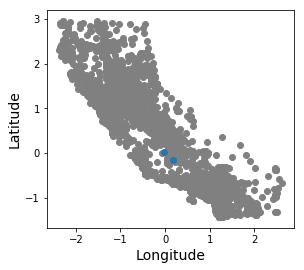

In [14]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

#k=2
k=2
print('SSE for k=2:')
print(SSE(train_set, kCentroidsTwo, clustersTwo, k))
print('Cluster Means:')
print(kCentroidsTwo)
print('Cluster Standard Deviations:')
print(stdDev(train_set, kCentroidsTwo, clustersTwo, k))

long = np.zeros(k)
lat = np.zeros(k)
for i in range(0,k):
    long[i] = kCentroidsTwo[i][0]
    lat[i] = kCentroidsTwo[i][1]
    
long2 = np.zeros(datasize)
lat2 = np.zeros(datasize)
for i in range(0,datasize):
    long2[i] = train_set[i][0]
    lat2[i] = train_set[i][1]


plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.scatter( x = long2, y=lat2, color='grey')
plt.scatter( x=long, y=lat)

plt.xlim(-1.25,1.25)
plt.ylim(-1.25,1.5)
plt.axis('scaled')

plt.show()

The graph above shows two clusters, one mainly for northern California and one for southern California. According to these results the two are generally pretty close together. 

In [15]:
#k=10

k = 10
kCentroidsTen, clustersTen = kMeans(train_set, k)


SSE for k=10:
55789.03579743114
Cluster Means:
[[-7.27092853e-01  1.13912927e+00 -4.35213505e-01 -4.06295105e-01
  -4.31127783e-01 -4.39818384e-01 -4.68256358e-01 -5.15480482e-01
  -8.43702503e-01  6.96864111e-02  8.80758808e-01  0.00000000e+00
   3.17460317e-02  1.78087495e-02]
 [-1.08804173e+00  1.04572811e+00 -7.03643516e-01  6.73445982e-01
   6.80214481e-01  5.83551182e-01  6.99304080e-01  1.89200472e-02
  -7.51629351e-02  2.94862773e-01  4.13089374e-01  0.00000000e+00
   1.86488388e-01  1.05559465e-01]
 [-1.28562750e+00  1.07071660e+00  1.19563431e+00 -4.12703141e-01
  -3.80851558e-01 -4.24160136e-01 -3.75624715e-01 -3.77310920e-01
  -1.39541137e-01  1.44193726e-01  1.81618052e-01  0.00000000e+00
   5.44854155e-01  1.29334067e-01]
 [ 2.15632422e-01 -1.82650690e-01 -1.01433926e+00  2.55801516e+00
   2.67387492e+00  2.40818171e+00  2.64821934e+00  2.06100162e-01
   1.31054502e-01  4.72131148e-01  3.67213115e-01  0.00000000e+00
   8.36065574e-02  7.70491803e-02]
 [ 9.60111809e-01 -8.

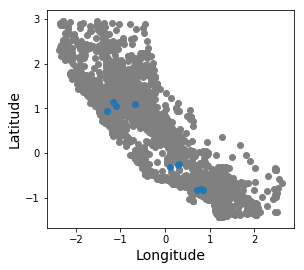

In [18]:
k=10
print('SSE for k=10:')
print(SSE(train_set, kCentroidsTen, clustersTen, k))
print('Cluster Means:')
print(kCentroids)

k=10
long = np.zeros(k)
lat = np.zeros(k)
for i in range(0,k):
    long[i] = kCentroidsTen[i][0]
    lat[i] = kCentroidsTen[i][1]

long2 = np.zeros(datasize)
lat2 = np.zeros(datasize)
for i in range(0,datasize):
    long2[i] = train_set[i][0]
    lat2[i] = train_set[i][1]
    
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.scatter( x = long2, y=lat2, color='grey')
plt.scatter( x=long, y=lat)
plt.xlim(-1.25,1.25)
plt.ylim(-1.25,1.5)
plt.axis('scaled')

plt.show()


In this graph, you can see the different areas of California broken down even more. In the south there are clusters for San Diego and Los Angeles, while in the north there are clusters around San Francisco, Sacramento, and the Silicon Valley area. With a k of 10, the SSE was 55789.

In [20]:
#Finding the best k value:
for k in range(2,10):
    kCentroids, clusters = kMeans(train_set, k)
    print('SSE for k=', k)
    print(SSE(train_set, kCentroids, clusters, k))

SSE for k= 2
129837.89363271117
SSE for k= 3
97865.2600744951
SSE for k= 4
85641.66426143488
SSE for k= 5
79372.10073322782
SSE for k= 6
70168.70973038263
SSE for k= 7
66134.25446401456
SSE for k= 8
61318.84668210683
SSE for k= 9
58126.49456129085


SSE for k= 10


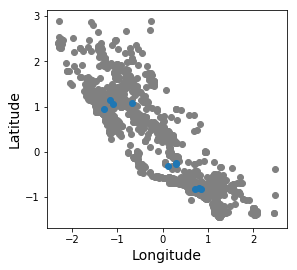

In [23]:
#Run test set on best k value:

k=10
datasize = int(test_set.size/numCols)    

kCentroids, clusters = kMeans(test_set, k)
print('SSE for k=', k)

long = np.zeros(k)
lat = np.zeros(k)
for i in range(0,k):
    long[i] = kCentroidsTen[i][0]
    lat[i] = kCentroidsTen[i][1]

long2 = np.zeros(datasize)
lat2 = np.zeros(datasize)
for i in range(0,datasize):
    long2[i] = test_set[i][0]
    lat2[i] = test_set[i][1]
    
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.scatter( x = long2, y=lat2, color='grey')
plt.scatter( x=long, y=lat)
plt.xlim(-1.25,1.25)
plt.ylim(-1.25,1.5)
plt.axis('scaled')

plt.show()


- - -
## 4. WRITING ON THE INTUITION FOR THE CALIFORNIA HOUSING CRISIS (10 pts)

This question is a qualitative one, and is intended to let you experiment with a real world clustering task. Hopefully it gives you some intuition as for how the preset number of clusters affects the clustering results. Too few clusters may not reveal the information that is in the data. Too many clusters may hurt data analysis as well, as it may not generalize (and in this sense, it is equivalent to over fitting).

Write at least one paragraph to demonstrate your intuition on the California Housing Crisis. You might also want to mention some possible solutions to solve it. You will receive credits based upon your insights and intuitions on this challenge. 



The California Housing Crisis is a complicated issue surrounding the ever increasing price of housing in California. The price of housing in all the major cities is incredibly expensive, a result of the large amount of people who want to live there. The graphs above all show the California housing situation broken into the most important clusters, which surround major areas like San Francisco and Los Angeles. Within these major geographic areas, there are a few clusters, which are differentiated by parameters other than location. These other parameters are likely housing price and income, as these are two parameters with a very large range.
The increasing housing prices are contributing to California's large homeless population. One solution to this crisis may be to build denser, cheaper housing. This tends to be difficult due to the fact that California is already so overcrowded, but building more new smaller housing could work to bring prices back down to a more manageable level.

- - - 
### NEED HELP?

In case you get stuck in any step in the process, you may find some useful information from:

 * Consult my lectures and/or the textbook
 * Talk to the TA, they are available and there to help you during their OH.
 * Come talk to me or email me <nn4pj@virginia.edu> with subject starting "CS4501 Assignment 3:...".

Best of luck and have fun!